In [22]:
import pandas as pd 
df = pd.read_parquet("04_results_texts_v5.parquet")
df.columns

Index(['index', 'topic', 'questions', 'gen_questions', 'Imperative Form',
       'Question', 'Search String', 'Positive', 'Hard Negative', 'raw_texts'],
      dtype='object')

In [23]:
df

,index,topic,questions,gen_questions,Imperative Form,Question,Search String,Positive,Hard Negative,raw_texts
82650,16512,Kryptographie,Zukunft der Kryptographie und Quantenkryptogra...,Zukunft der Kryptographie und Quantenkryptogra...,"""Erkläre die zukünftige Bedeutung von Quantenk...","""Welche Rolle wird Quantenkryptographie in der...",Zukunft Kryptographie Quantenkryptographie,NaN,NaN,Hard negative german document (not containing ...
82649,16512,Kryptographie,Angriffe und Sicherheitslücken in Kryptosystemen,Angriffe und Sicherheitslücken in Kryptosystem...,"""Untersuche bekannte Angriffe auf Kryptosysteme.""","""Welche Angriffe sind bekannt für Kryptosysteme?""",Bekannte Angriffe auf Kryptosysteme,NaN,NaN,Hard negative german document (not containing ...
82648,16512,Kryptographie,Anwendungen von Kryptographie in Sicherheit un...,Anwendungen von Kryptographie in Sicherheit un...,"""Beschreibe, wie Kryptographie zur Verbesserun...","""Wie wird Kryptographie in der Sicherheit und ...",Anwendungen Kryptographie Sicherheit Privatsphäre,NaN,NaN,Hard negative german document (not containing ...
82647,16512,Kryptographie,Vergleich von symmetrischen und asymmetrischen...,Vergleich von symmetrischen und asymmetrischen...,"""Vergleiche die Funktionsweise symmetrischer u...","""Was ist der Unterschied in der Funktionsweise...",Unterschied symmetrische und asymmetrische Ver...,NaN,NaN,Hard negative german document (not containing ...
82646,16512,Kryptographie,Geschichte und Entwicklung von Kryptographie,Geschichte und Entwicklung von Kryptographie\n...,"""Erkläre die Geschichte und Entwicklung der Kr...","""Wie hat sich die Kryptographie im Laufe der G...",Geschichte und Entwicklung Kryptographie,NaN,NaN,Hard negative german document (not containing ...
...,...,...,...,...,...,...,...,...,...,...
4,0,AK-47-Sturmgewehr,AK-47 in verschiedenen Konflikten,AK-47 in verschiedenen Konflikten\nImperative ...,"""Veranschauliche die Verwendung des AK-47 in v...","""Wie wurde das AK-47 in verschiedenen Konflikt...",AK-47 Einsatz in Konflikten,NaN,NaN,nan
3,0,AK-47-Sturmgewehr,Technische Daten der AK-47,Technische Daten der AK-47\nImperative Form: ...,"""Notiere die technischen Spezifikationen der A...","""Welche sind die technischen Spezifikationen d...",technische Daten AK-47,NaN,NaN,nan
2,0,AK-47-Sturmgewehr,Historischer Hintergrund der AK-47,Historischer Hintergrund der AK-47\nImperative...,"""Erkläre den historischen Hintergrund der AK-47.""","""Was ist der historische Hintergrund der AK-47?""",historischer Hintergrund AK-47,NaN,NaN,nan
1,0,AK-47-Sturmgewehr,Vergleich von AK-47 mit anderen Sturmgewehren,Vergleich von AK-47 mit anderen Sturmgewehren\...,"""Vergleiche die Leistung des AK-47 mit anderen...","""Wie unterscheidet sich die Leistung des AK-47...",AK-47 Leistungsvergleich mit anderen Sturmgewe...,NaN,NaN,nan


In [24]:
len(df)

82651

In [25]:
len(df[df["raw_texts"]!="nan"])

23392

In [26]:
for n, row in df[df["raw_texts"]!="nan"].iloc[-3:].iterrows():
    print(row["topic"])
    print(row[["Imperative Form", "Question", "Search String"]].values)
    print(row["raw_texts"])

Kreativität
['"Schildere Methoden zur Förderung von Kreativität im Alltag."'
 '"Welche Methoden gibt es, um Kreativität im Alltag zu fördern?"'
 'Methoden Kreativität im Alltag fördern']
Hard negative german document (not containing the viable information for the queries!):

Kreativität ist ein wichtiger Bestandteil unseres täglichen Lebens. Ob im Beruf oder in der Freizeit, kreative Fähigkeiten können uns helfen, Probleme zu lösen, Ideen zu entwickeln und unsere Perspektive zu erweitern. Aber wie können wir unsere Kreativität im Alltag fördern?

Eine Möglichkeit ist, sich Zeit für kreative Aktivitäten zu nehmen. Dies kann bedeuten, Malen, Schreiben, Musizieren oder sogar Kochen. Durch das Ausüben einer kreativen Tätigkeit können Sie Ihre Gedanken frei fließen lassen und Ihre Kreativität steigern.

Eine andere Möglichkeit ist, sich mit anderen Menschen auszutauschen und von ihnen zu lernen. Durch den Austausch von Ideen und Perspektiven können Sie Ihre eigene Kreativität anregen und ne

# Statistics of Dataset
## Characters

In [27]:
charlengths = df[df["raw_texts"]!="nan"]['raw_texts'].str.len()
mean_char_length = charlengths.mean()
characters = mean_char_length/2
print(f"Mean number of characters: {characters}")


Mean number of characters: 1430.4581053351574


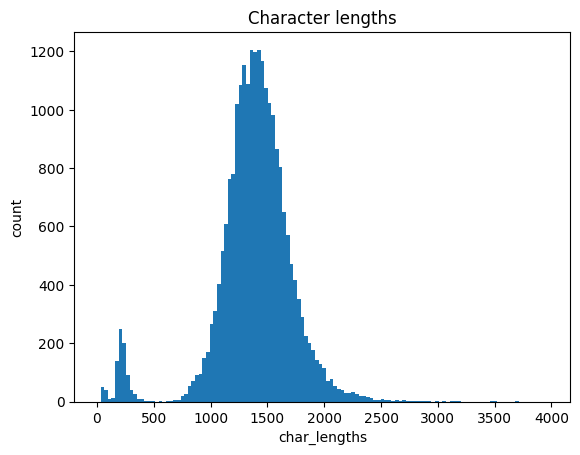

In [28]:
import matplotlib.pyplot as plt 
bins = range(0,4000,32)
hist = plt.hist(charlengths/2, bins=bins)
title = plt.title("Character lengths")
xlabel = plt.xlabel("char_lengths")
ylabel = plt.ylabel("count")

## Words

In [29]:
import numpy as np 
word_lengths = df[df["raw_texts"]!="nan"]['raw_texts'].str.split().apply(len)
mean_word_length = word_lengths.mean()
words = mean_word_length/2
print(f"Mean number of words: {words}")

Mean number of words: 190.1605890902873


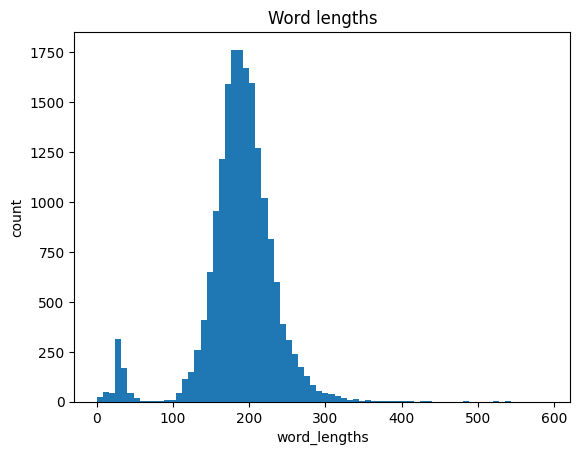

In [9]:
import matplotlib.pyplot as plt 
bins = range(0,600,8)
hist = plt.hist(word_lengths/2, bins=bins)
title = plt.title("Word lengths")
xlabel = plt.xlabel("word_lengths")
ylabel = plt.ylabel("count")

## Tokens

In [30]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('gpt2')

import numpy as np 
token_lengths = df[df["raw_texts"]!="nan"]['raw_texts'].apply(lambda text: len(tokenizer.encode(text, add_special_tokens=True)))-len(tokenizer.encode("Hard negative example (not containing the answer to the questions!):"))-len(tokenizer.encode("Positive example (answering the questions directly):"))
mean_token_length = token_lengths.mean()
tokens = mean_token_length/2
print(f"Mean number of words: {tokens}")




Token indices sequence length is longer than the specified maximum sequence length for this model (1174 > 1024). Running this sequence through the model will result in indexing errors


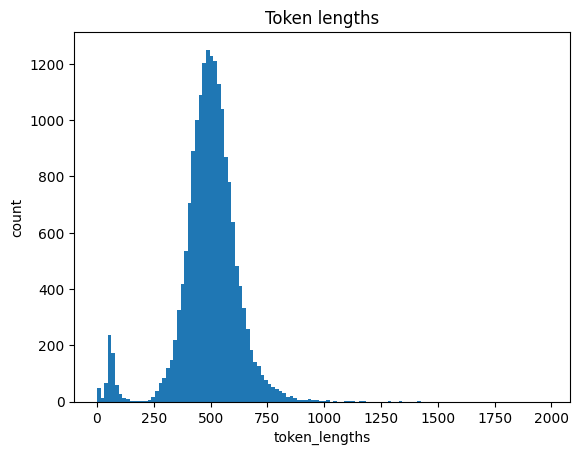

In [ ]:
import matplotlib.pyplot as plt 
bins = range(0,2000,16)
hist = plt.hist(token_lengths/2, bins=bins)
title = plt.title("Token lengths")
xlabel = plt.xlabel("token_lengths")
ylabel = plt.ylabel("count")

# Output-Example

In [ ]:
from pprint import pprint 
row = 33
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Erstelle eine Liste mit wichtigen Reisetipps und Sicherheitshinweisen für eine Reise nach Thailand."
Search String:
Reisetipps Thailand Sicherheit
Question:
"Was sind wichtige Reisetipps und Sicherheitshinweise für eine Reise nach Thailand?"
---------[Raw Text]---------
nan


In [ ]:
from pprint import pprint
import random 

row = df[df["raw_texts"]!="nan"][:3].sample(1).index[0]
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Erkläre die zukünftige Bedeutung von Quantenkryptographie in der Kryptographie."
Search String:
Zukunft Kryptographie Quantenkryptographie
Question:
"Welche Rolle wird Quantenkryptographie in der Zukunft der Kryptographie spielen?"
---------[Raw Text]---------
Hard negative german document (not containing the viable information for the queries!):

Die Bedeutung von Kryptographie in der heutigen digitalen Welt ist von großer Bedeutung. Kryptographie ist die Wissenschaft, die sich mit der Verschlüsselung und Sicherung von Informationen beschäftigt. Es gibt verschiedene Arten von Kryptographie, wie zum Beispiel symmetrische und asymmetrische Kryptographie.

Symmetrische Kryptographie ist eine Methode, bei der der gleiche Schlüssel sowohl für die Verschlüsselung als auch für die Entschlüsselung von Daten verwendet wird. Asymmetrische Kryptographie hingegen verwendet zwei verschiedene Schlüssel, einen für die Verschlüsselung und einen anderen 

In [463]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Finden Sie Studien, die die Ursachen des Klimawandels untersuchen."
Search String:
Studien Klimawandel-Ursachen
Question:
"Wo kann ich Studien finden, die die Ursachen des Klimawandels untersuchen?"
---------[Raw Text]---------
nan


In [325]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Finden Sie Informationen über die Integration von erneuerbaren Energien in das Stromnetz."
Search String:
Integration erneuerbarer Energien Stromnetz
Question:
"Wie wird die Integration erneuerbarer Energien in das Stromnetz durchgeführt?"
---------[Raw Text]---------
Hard negative example (not containing the answer to the questions!):

Erneuerbare Energien sind eine wichtige Säule der Energiepolitik und tragen zur Reduzierung von Treibhausgasemissionen bei. Doch wie sieht es mit der Nutzung von Solarenergie in Deutschland aus? Laut Bundesverband Solarwirtschaft e.V. wurden im Jahr 2020 rund 4,8 Gigawatt an Solarenergieleistung installiert. Dies entspricht einem Anstieg von 3 % im Vergleich zum Vorjahr. Doch wie wird die Solarenergie genutzt? In Deutschland wird Solarenergie hauptsächlich zur Stromerzeugung eingesetzt. Die erzeugte Energie wird ins Stromnetz eingespeist und kann so von Verbrauchern genutzt werden. Doch wie funktioniert da

In [326]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print("---------[Questions]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions]---------
Imperative Form:
"Suchen Sie nach Artikeln, die die Geschichte der Astronomie beschreiben."
Search String:
Artikel Geschichte der Astronomie
Question:
"Wo kann ich Artikel finden, die die Geschichte der Astronomie beschreiben?"
---------[Raw Text]---------
Hard negative example (not containing the answer to the questions!):

Die Geschichte der Botanik ist ebenso faszinierend wie die Geschichte der Astronomie. Schon vor tausenden von Jahren versuchten Menschen, die Pflanzenwelt zu verstehen und zu kategorisieren. Die alten Griechen und Römer machten erste zaghafte Versuche, Pflanzen zu benennen und zu klassifizieren. Im Mittelalter entwickelten sich dann die Klostergärten, in denen Mönche heimische und exotische Pflanzen anbauten und studierten. Im 16. und 17. Jahrhundert erlebte die Botanik schließlich ihre Blütezeit, als Naturforscher wie Carl von Linné systematische Namen und Klassifikationen für Pflanzen einführten. Auch heute noch ist die Botanik ein a

In [352]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print(f"---------[Questions {row}]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
print(df["raw_texts"][row])

---------[Questions 7964]---------
Imperative Form:
"Ermittle Benutzerkonten mit spezifischen Rechten."
Search String:
Benutzerkonten mit bestimmten Rechten finden
Question:
"Welche Benutzerkonten besitzen bestimmte Rechte?"
---------[Raw Text]---------
Hard negative example (not containing the answer to the questions!):

Benutzerkonten sind heutzutage ein wichtiger Bestandteil vieler Online-Dienste und -Plattformen. Ob bei sozialen Medien, E-Commerce-Websites oder Unternehmenssoftware – Benutzerkonten ermöglichen es, individuelle Einstellungen vorzunehmen und persönliche Daten zu speichern. Doch was passiert, wenn man vergisst, sich abzumelden? In vielen Fällen bleibt das Konto aktiv und andere Nutzer können potenziell auf die persönlichen Daten zugreifen. Um dies zu verhindern, sollten Nutzer sich immer abmelden, wenn sie einen Online-Dienst verlassen. Zusätzlich können Zwei-Faktor-Authentifizierung und starke Passwörter dazu beitragen, die Sicherheit von Benutzerkonten zu erhöhen.



In [328]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print(f"---------[Questions {row}]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
pprint(df["raw_texts"][row], width=180)

---------[Questions 1319]---------
Imperative Form:
"Suche nach Experten, die sich auf antike Möbel spezialisiert haben."
Search String:
Experten antike Möbel
Question:
"Wer sind Experten auf dem Gebiet antiker Möbel?"
---------[Raw Text]---------
('Hard negative example (not containing the answer to the questions!):\n'
 '\n'
 'Die Welt der antiken Möbel ist faszinierend und vielseitig. Von römischen Betten über gotische Truhen bis hin zu barocken Sesseln gibt es eine Fülle von Stilen und Epochen, die '
 'die Geschichte der Möbelherstellung erzählen. Doch nicht nur die Optik und die handwerkliche Meisterschaft begeistern Sammler und Enthusiasten. Antike Möbelstücke sind oft auch '
 'von historischer Bedeutung und können uns viel über vergangene Kulturen und Lebensweisen verraten. Leider ist es nicht immer einfach, die Echtheit und den Wert antiker Möbel zu '
 'bestimmen. Ohne entsprechendes Fachwissen kann man schnell auf Fälschungen hereinfallen oder den wahren Wert eines Stückes unte

In [362]:
from pprint import pprint
import random 

row = random.randint(0,len(df[df["raw_texts"]!="nan"]))
print(f"---------[Questions {row}]---------")
print("Imperative Form:")
print(df["Imperative Form"][row])
print("Search String:")
print(df["Search String"][row])
print("Question:")
print(df["Question"][row])
print("---------[Raw Text]---------")
pprint(df["raw_texts"][row], width=180)

---------[Questions 13535]---------
Imperative Form:
"Suche nach Lehrbüchern zum Thema Maschinelles Lernen"
Search String:
Lehrbücher Maschinelles Lernen kaufen
Question:
"Wo kann ich Lehrbücher und Kursmaterialien zum Thema Maschinelles Lernen finden?"
---------[Raw Text]---------
('Hard negative example (not containing the answer to the questions!):\n'
 '\n'
 'Maschinelles Lernen ist ein faszinierendes und zunehmend relevantes Feld in der Informatik und Datenwissenschaft. Es beinhaltet die Entwicklung von Algorithmen, die automatisch '
 'Muster und Strukturen in Daten erkennen und daraus Schlussfolgerungen ziehen können. Obwohl es eng mit der künstlichen Intelligenz verwandt ist, liegt der Fokus von '
 'Maschinellem Lernen auf der Verbesserung von Systemleistung durch Erfahrung, anstatt explizites Wissen zu codieren.\n'
 '\n'
 'In der Praxis wird Maschinelles Lernen in vielen Anwendungen eingesetzt, wie zum Beispiel in der Bild- und Spracherkennung, Empfehlungssystemen, und in der me